## Downloading Dataset

In [1]:
from mit_d3m import load_dataset # Importing Dataset
ozone = load_dataset('LL0_1487_ozone_level_8hr') # Loading Dataset

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Dataset Context

In [2]:
ozone.context

{'target_entity': 'learningData',
 'entities': {'learningData': (          d3mIndex   V1   V2   V3   V4   V5   V6   V7   V8   V9  ...   V63  \
   d3mIndex                                                         ...         
   0                0  0.8  1.8  2.4  2.1  2.0  2.1  1.5  1.7  1.9  ... -15.5   
   2                2  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ... -15.9   
   3                3  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ... -16.8   
   5                5  3.1  3.5  3.3  2.5  1.6  1.7  1.6  1.6  2.3  ... -11.8   
   6                6  3.7  3.2  3.8  5.1  6.0  7.0  6.3  6.4  6.3  ... -11.8   
   ...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
   2528          2528  0.9  0.4  0.3  0.2  0.3  0.2  0.3  0.3  0.3  ... -17.1   
   2529          2529  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  ... -12.4   
   2530          2530  1.0  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  ... -12.0   
   2531          2531  0.8  0.8  1.2  0.9  0.4 

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import warnings

### Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # Importing Library for Splitting the Dataset into Train & Test Set
from imblearn.over_sampling import SMOTE # Importing 'SMOTE' to Handel Imbalance Dataset

### Models

In [45]:
from sklearn.linear_model import LogisticRegression # Importing 'LogistocRegression' Machine Learning Model
from sdv.tabular import GaussianCopula # Importing 'GaussianCoupla' Model
from sdv.tabular import CTGAN # Importing 'CTGAN' Model
from sdv.tabular import CopulaGAN # Importing 'CopulaGAN' Model

### Evaluation Metrics

In [6]:
from sklearn.metrics import accuracy_score# Importing 'accuracy_score' Class for Model Evaluation 
from numpy import mean, absolute # Importing 'mean' & 'absolute' to Calculate Accuracy Score
from sdv.evaluation import evaluate # Importing 'evaluate' Class for Synthetic Dataset Evaluation

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Removing Warning Messages

In [7]:
warnings.filterwarnings(action = 'ignore')

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Predictor & Response Variable

In [8]:
X = ozone.X # Predictor Variables
y = ozone.y # Response Variables

## Data Pre-Processing

In [9]:
dataset = pd.concat([X,y], axis = 1) # Joining 'X' & 'y' in a Single Data Frame
dataset.isnull().sum() # Printing Total 'NULL' Values in the Dataset

d3mIndex    0
V1          0
V2          0
V3          0
V4          0
           ..
V69         0
V70         0
V71         0
V72         0
Class       0
Length: 74, dtype: int64

In [10]:
dataset = dataset.drop(['d3mIndex'], axis = 1) # Removing Number Index

### Extracting Predictor & Response Variable 

In [11]:
X = dataset.iloc[:, :-1] # Extracting Predictor Variables
y = dataset.iloc[:, -1] # Extracting Response Variables

### Checking Class Imbalance

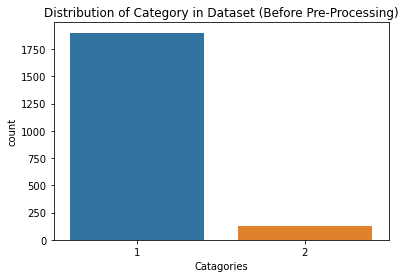

In [12]:
before = pd.DataFrame(y) # Converting Response Variable into a Dataframe
before.columns = ['Catagories'] # Giving Column Name 

sns.countplot(x = 'Catagories', data = before) # Plotting The Count Graph
plt.title('Distribution of Category in Dataset (Before Pre-Processing)') # Giving Title To The Graph
plt.show() # Showing The Graph

### Balancing Dataset

In [13]:
smote = SMOTE() # Applying Synthteic Minority Oversampling Technique to Balance the Dataset
X, y = smote.fit_resample(X, y) # Applying the Model

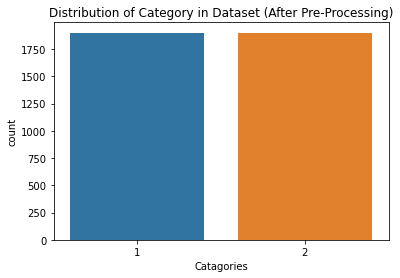

In [14]:
after = pd.DataFrame(y) # Converting Response Variable into a Dataframe
after.columns = ['Catagories'] # Giving Column Name

sns.countplot(x = 'Catagories', data = after) # Plotting The Count Graph
plt.title('Distribution of Category in Dataset (After Pre-Processing)') # Giving Title To The Graph
plt.show() # Showing The Graph

### Training & Test Set Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## XG Boost Classification Model

In [46]:
model = LogisticRegression() # Initializing the Classification Model
model.fit(X_train, y_train)

LogisticRegression()

### Evaluating Model

In [47]:
cv = KFold(n_splits=10, random_state = 1, shuffle = True) # Defining Cross-Validation Method 

scores = cross_val_score(model, X, y, cv = cv, n_jobs = -1) # Evaluating the Model
print('Average Accuracy of the Model -> ', round(mean(absolute(scores)) * 100), '%') # Printing Results

Average Accuracy of the Model ->  84 %


**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Synthetic Data Instances

### Gaussian Copula Model


In [ ]:
syn_model = GaussianCopula() # Initializing the Model
syn_model.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model.save('Saved Model/Copula.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [18]:
gaussian = GaussianCopula.load('Saved Model/Gaussian.pkl')

In [19]:
syn_data = gaussian.sample(num_rows = 300) # Generating Synthetic Data
syn_data # Printing the Generated Data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V64,V65,V66,V67,V68,V69,V70,V71,V72,Class
0,1.625492,2.367953,1.70864,2.270905,2.720547,4.812224,5.175530,5.057845,4.996732,4.752012,...,0.217566,28.831074,5.470561,5757.715568,19.113561,40.504650,10151.489123,-59.786142,1.689368,1
1,0.263729,0.369777,0.14327,0.103816,0.441673,0.244586,0.638592,0.665057,1.278793,1.494432,...,0.356054,9.094421,-1.951533,5761.041728,26.242184,45.598197,10089.651812,-33.727342,0.732303,1
2,0.859618,0.352135,0.57122,0.503327,0.701434,0.648381,0.602651,1.255204,1.723815,2.445703,...,0.243555,10.607444,9.424020,5764.506413,-4.126655,31.959178,10128.229553,15.295416,2.872779,1
3,1.274931,0.530609,1.80715,0.516159,0.269072,0.727361,1.266514,0.867731,1.565008,2.963409,...,0.652213,-3.124255,-1.829184,5893.271958,32.720264,53.305073,10180.342370,-21.676833,2.962825,1
4,1.058355,1.199907,2.11491,0.678200,1.239763,0.624763,1.620778,2.361045,2.810678,2.133299,...,0.363263,15.258908,-4.558745,5823.568314,21.222455,40.540154,10146.442496,-47.792224,0.423452,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.928280,3.541703,3.40129,2.629617,2.223892,3.197919,2.829379,1.867077,2.435578,3.084469,...,0.090965,12.188304,-3.068819,5737.172364,-4.883315,37.170681,10144.065215,-9.451366,0.927657,1
296,3.742804,2.866903,3.07566,2.428746,2.553248,2.425117,2.323426,2.753962,5.226692,4.560877,...,0.316725,13.965056,6.974146,5705.907398,19.474642,49.296131,10021.367043,41.909422,0.776724,1
297,0.445974,0.145936,0.50622,0.421824,0.901777,2.750588,2.140925,2.694773,2.163308,1.710217,...,0.033210,2.665599,1.004985,5772.467728,3.684367,28.878385,10185.336568,0.954797,0.248343,2
298,0.112763,0.216256,0.54094,0.246007,0.083240,0.313121,0.403483,0.820887,2.055543,3.218749,...,0.240504,15.497757,-3.264033,5677.233125,-11.022749,41.157314,10102.265019,23.677046,0.122683,1


#### Data Pre Processing

##### Extracting Predictor & Response Variable

In [20]:
syn_X = syn_data.iloc[:, :-1] # Predictor Variable
syn_y = syn_data.iloc[:, -1] # Response Variable

#### Evaluating Synthetic Instances

Testing Generated Synthetic Data On The Model Trained with Original Datapoints

In [48]:
syn_acc = model.predict(syn_X) # Prediction
print("Average Accuracy of the Model-> ", round(accuracy_score(syn_acc, syn_y)*100), "%") # Average Accuracy Score of the Model

Average Accuracy of the Model->  75 %


Statistical Metrics

In [26]:
general_evaluation = evaluate(syn_data, dataset) # Evaluating on All Metrics
KS_test = evaluate(syn_data, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [27]:
evaluation = [general_evaluation, KS_test] # Creating a List of the Results
evaluation = pd.DataFrame(evaluation) # Creating a Data Frame of the Results
evaluation.columns = ['Results'] # Gicing Column Name
evaluation.rename({0:'General Evaluation', 1:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.565483
Inverted Kolmogorov-Smirnov Test,0.907677


In [24]:
p_KS_test = 1-KS_test # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [28]:
p_value = [p_KS_test] # Creating a List of the Results
p_value = pd.DataFrame(p_value) # Creating a Data Frame of the Results
p_value.columns = ['P Values'] # Gicing Column Name
p_value.rename({0:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Inverted Kolmogorov-Smirnov P Value,0.092323


### CT GAN

In [ ]:
syn_model2 = CTGAN() # Initializing the Model
syn_model2.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model2.save('Saved Model/CT_GAN.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [29]:
ct_gan = CTGAN.load('Saved Model/CT_GAN.pkl')

In [30]:
syn_data2 = ct_gan.sample(num_rows = 203) # Generating Synthetic Data
syn_data2 # Printing Generated Data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V64,V65,V66,V67,V68,V69,V70,V71,V72,Class
0,2.709564,0.000000,0.93316,0.847588,1.560414,0.440079,1.273094,2.344100,2.840955,0.356398,...,0.341105,6.244598,-0.255093,5817.952521,15.143274,41.323107,10214.364415,-65.317605,0.000000,1
1,0.357907,0.936338,0.76196,1.181035,0.930354,2.338969,1.857616,0.000000,5.286132,0.826881,...,0.106597,12.696673,-3.203806,5847.717176,38.889346,47.730825,10303.304138,12.368277,0.000000,1
2,0.897101,0.746752,2.31051,2.887267,0.902585,1.048658,1.583573,0.414910,2.961022,4.539250,...,0.632944,5.687053,-0.982077,5899.227722,24.933722,46.554063,10180.718868,43.763752,0.000000,1
3,2.049287,0.014528,1.88661,0.605937,0.933053,1.304435,4.748568,2.534742,2.896703,4.163181,...,0.165241,12.771201,-3.665011,5924.446085,32.630856,42.221102,10197.985554,7.672125,0.000000,1
4,1.085887,0.000000,1.62404,1.450536,0.635242,1.099968,1.146439,2.420304,4.889098,2.815703,...,0.034793,11.858556,5.931762,5862.526594,22.878938,59.150000,10218.373965,-60.098880,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.738721,0.000000,0.77530,0.694250,0.439796,2.099059,2.367157,1.145140,2.085821,1.838841,...,0.283546,8.593764,-10.914320,5904.149943,27.764818,48.784116,10224.648752,2.671621,0.000000,2
199,1.778360,2.875993,1.99398,4.021730,5.468124,1.707957,1.781843,1.225993,2.211762,5.011561,...,0.103858,16.641021,20.949490,5761.393448,22.200980,23.440932,10210.073680,-135.000000,0.000000,1
200,1.376264,5.196854,1.22008,3.848337,1.873218,0.988186,4.407274,4.249009,2.744315,7.487010,...,0.124523,1.219879,14.026149,5909.861863,29.447525,11.059664,10286.056938,-58.659713,0.000000,1
201,0.380280,1.663194,3.32227,1.233732,7.200000,1.106104,0.798480,1.606920,3.255026,3.091461,...,0.273037,8.201325,19.234148,5853.537081,8.202969,43.059197,10111.379861,-93.917503,0.059256,1


#### Data Pre Processing

##### Extracting Predictor & Response Variable

In [31]:
syn_X2 = syn_data2.iloc[:, :-1] # Predictor Variable
syn_y2 = syn_data2.iloc[:, -1] # Response Variable

#### Evaluating Synthetic Instances

Testing Generated Synthetic Data On The Model Trained with Original Datapoints

In [49]:
syn2_acc = model.predict(syn_X2) # Prediction
print("Average Accuracy of the Model-> ", round(accuracy_score(syn2_acc, syn_y2)*100), "%") # Average Accuracy Score of the Model

Average Accuracy of the Model->  78 %


Statistical Metrics

In [33]:
general_evaluation2 = evaluate(syn_data2, dataset) # Evaluating on All Metrics
KS_test2 = evaluate(syn_data2, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [34]:
evaluation2 = [general_evaluation2, KS_test2] # Creating a List of the Results
evaluation2 = pd.DataFrame(evaluation2) # Creating a Data Frame of the Results
evaluation2.columns = ['Results'] # Gicing Column Name
evaluation2.rename({0:'General Evaluation', 1:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.342457
Inverted Kolmogorov-Smirnov Test,0.780447


In [35]:
p_KS_test2 = 1-KS_test2 # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [36]:
p_value2 = [p_KS_test2] # Creating a List of the Results
p_value2 = pd.DataFrame(p_value2) # Creating a Data Frame of the Results
p_value2.columns = ['P Values'] # Gicing Column Name
p_value2.rename({0:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Inverted Kolmogorov-Smirnov P Value,0.219553


**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

### Copula GAN 

In [ ]:
syn_model3 = CopulaGAN() # Initializing the Model
syn_model3.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model3.save('Saved Model/Copula GAN.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [37]:
copula = CopulaGAN.load('Saved Model/Copula_GAN.pkl')

In [38]:
syn_data3 = copula.sample(num_rows = 2013) # Generating Synthetic Data
syn_data3 # Printing Generated Data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V64,V65,V66,V67,V68,V69,V70,V71,V72,Class
0,0.433866,0.744388,1.60174,1.235554,0.661775,1.305627,0.256724,1.468212,4.401441,2.745900,...,0.606362,25.523987,1.798105,5843.597008,-3.267557,52.332456,10123.192240,-14.295162,0.692014,1
1,0.453870,1.527348,1.95083,4.071529,1.669244,2.643652,0.398735,1.229868,2.399344,2.634725,...,0.508350,9.956423,-9.207196,5959.202037,2.242752,48.692346,9975.000032,-29.079233,0.000000,1
2,1.496561,5.573056,0.65750,4.341028,3.514997,0.576474,1.366183,2.352909,0.414652,3.451067,...,0.033210,8.164675,-4.904320,5940.225662,0.532554,34.814568,10054.883638,-0.887948,0.000000,1
3,0.577939,1.273926,1.39876,1.405030,0.617518,1.955704,0.208381,1.597902,5.328190,1.673106,...,0.054898,8.190621,13.397602,5885.681315,24.712856,39.354483,10118.190150,-13.915493,0.000000,1
4,0.747082,1.223945,1.84622,4.089017,5.370106,1.649485,2.709742,4.184821,2.734484,2.734219,...,0.153276,11.584585,3.221659,5933.239790,16.160071,49.626348,10071.864843,-29.646505,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.557203,0.527742,1.90418,0.063627,0.513506,0.128774,2.375172,0.028207,2.729876,2.108752,...,0.140640,1.742003,8.851706,5940.045826,11.726814,43.350327,10122.828102,-6.454106,11.282020,1
2009,0.483698,2.712349,3.74646,1.601283,1.512412,1.622276,0.496001,2.728323,2.501188,1.022004,...,0.090994,25.270585,6.961729,5871.352466,31.554244,35.111923,10191.975132,-33.896380,0.000000,2
2010,0.073779,0.451811,1.05661,4.747714,1.007310,0.648583,2.383246,3.042540,4.163208,2.623660,...,0.975964,11.187120,-21.183553,5894.306065,14.882976,38.116831,10135.563259,-35.127065,0.000000,1
2011,1.853512,6.024304,4.16495,0.025207,0.723304,0.679844,1.032037,1.497396,0.733580,7.732911,...,0.864136,-11.287479,4.232214,5831.114219,4.015985,45.251682,10197.933806,-22.529558,0.000000,1


#### Data Pre Processing

##### Extracting Predictor & Response Variable

In [39]:
syn_X3 = syn_data3.iloc[:, :-1] # Predictor Variable
syn_y3 = syn_data3.iloc[:, -1] # Response Variable

#### Evaluating Synthetic Instances

Testing Generated Synthetic Data On The Model Trained with Original Datapoints

In [50]:
syn3_acc = model.predict(syn_X3) # Prediction
print("Average Accuracy of the Model-> ", round(accuracy_score(syn3_acc, syn_y3)*100), "%") # Average Accuracy Score of the Model

Average Accuracy of the Model->  73 %


Statistical Metrics

In [41]:
general_evaluation3 = evaluate(syn_data3, dataset) # Evaluating on All Metrics
KS_test3 = evaluate(syn_data3, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [42]:
evaluation3 = [general_evaluation3, KS_test3] # Creating a List of the Results
evaluation3 = pd.DataFrame(evaluation3) # Creating a Data Frame of the Results
evaluation3.columns = ['Results'] # Gicing Column Name
evaluation3.rename({0:'General Evaluation', 1:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.357940
Inverted Kolmogorov-Smirnov Test,0.803624


In [43]:
p_KS_test3 = 1-KS_test3 # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [44]:
p_value3 = [p_KS_test3] # Creating a List of the Results
p_value3 = pd.DataFrame(p_value3) # Creating a Data Frame of the Results
p_value3.columns = ['P Values'] # Gicing Column Name
p_value3.rename({0:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Inverted Kolmogorov-Smirnov P Value,0.196376


**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**